# The Schelling Model
<a href="https://colab.research.google.com/github/milocortes/mod_04_concentracion/blob/main/src/ising_schelling/python/notebooks/schelling_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from numpy.random import uniform, randint
from numba import njit

"""
Tomado de la ligua:
https://jstac.github.io/edtc-code/ch1.html
"""
# The Schelling Model
n = 1000                # number of agents (agents = 0, ..., n-1)
k = 10                  # number of agents regarded as neighbors
require_same_type = 5   # want >= require_same_type neighbors of the same type

def initialize_state():
    locations = uniform(size=(n, 2))
    types = randint(0, high=2, size=n)   # label zero or one
    return locations, types

@njit
def compute_distances_from_loc(loc, locations):
    " Compute distance from location loc to all other points. "
    distances = np.empty(n)
    for j in range(n):
        distances[j] = np.linalg.norm(loc - locations[j, :])
    return distances

def get_neighbors(loc, locations):
    " Get all neighbors of a given location. "
    all_distances = compute_distances_from_loc(loc, locations)
    indices = np.argsort(all_distances)   # sort agents by distance to loc
    neighbors = indices[:k]               # keep the k closest ones
    return neighbors

def is_happy(i, locations, types):
    happy = True
    agent_loc = locations[i, :]
    agent_type = types[i]
    neighbors = get_neighbors(agent_loc, locations)
    neighbor_types = types[neighbors]
    if sum(neighbor_types == agent_type) < require_same_type:
        happy = False
    return happy

def count_happy(locations, types):
    " Count the number of happy agents. "
    happy_sum = 0
    for i in range(n):
        happy_sum += is_happy(i, locations, types)
    return happy_sum
    
def update_agent(i, locations, types):
    " Move agent if unhappy. "
    moved = False
    while not is_happy(i, locations, types):
        moved = True
        locations[i, :] = uniform(), uniform()
    return moved

def plot_distribution(locations, types, title, savepdf=False):
    " Plot the distribution of agents after cycle_num rounds of the loop."
    fig, ax = plt.subplots()
    colors = 'red', 'blue'
    for agent_type, color in zip((0, 1), colors):
        idx = (types == agent_type)
        ax.plot(locations[idx, 0], 
                locations[idx, 1], 
                'o', 
                markersize=8,
                markerfacecolor=color, 
                alpha=0.8)
    ax.set_title(title)
    if savepdf:
        plt.savefig(title + '.pdf')
    plt.show()


def sim_sequential(max_iter=100):
    """
    Simulate by sequentially stepping through the agents, one after
    another.

    """

    locations, types = initialize_state()
    current_iter = 0

    while current_iter < max_iter:
        print("Entering iteration ", current_iter)

        plot_distribution(locations, types, f'cycle_{current_iter}')

        # Update all agents
        num_moved = 0
        for i in range(n):
            num_moved += update_agent(i, locations, types)

        if num_moved == 0:
            print(f"Converged at iteration {current_iter}")
            break

        current_iter += 1


def sim_random_select(max_iter=100_000, flip_prob=0.01, test_freq=10_000):
    """
    Simulate by randomly selecting one household at each update.

    Flip the color of the household with probability `flip_prob`.

    """

    locations, types = initialize_state()
    current_iter = 0

    while current_iter <= max_iter:

        # Choose a random agent and update them
        i = randint(0, n)
        moved = update_agent(i, locations, types)

        if flip_prob > 0: 
            # flip agent i's type with probability epsilon
            U = uniform()
            if U < flip_prob:
                current_type = types[i]
                types[i] = 0 if current_type == 1 else 1

        # Every so many updates, plot and test for convergence
        if current_iter % test_freq == 0:   
            cycle = current_iter / n
            plot_distribution(locations, types, f'iteration {current_iter}')
            if count_happy(locations, types) == n:
                print(f"Converged at iteration {current_iter}")
                break

        current_iter += 1

    if current_iter > max_iter:
        print(f"Terminating at iteration {current_iter}")

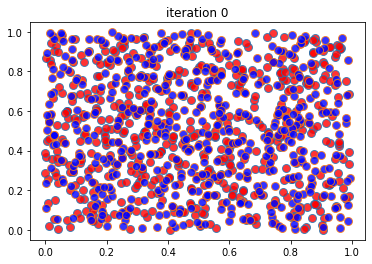

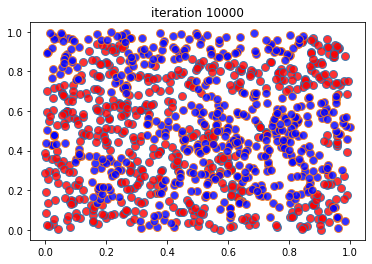

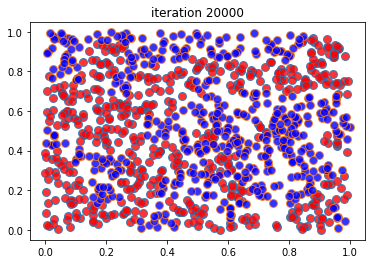

Converged at iteration 20000


In [2]:
sim_random_select(max_iter=50_000, flip_prob=0.0, test_freq=10_000)